In [7]:
import cv2
import numpy as np
from PIL import Image

def crop_minAreaRect(img, rect):

    # rotate img
    angle = rect[2]
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(img,M,(cols,rows))

    # rotate bounding box
    rect0 = (rect[0], rect[1], 0.0) 
    box = cv2.boxPoints(rect0)
    pts = np.int0(cv2.transform(np.array([box]), M))[0]    
    pts[pts < 0] = 0

    # crop
    img_crop = img_rot[pts[1][1]:pts[0][1], 
                       pts[1][0]:pts[2][0]]

    return img_crop

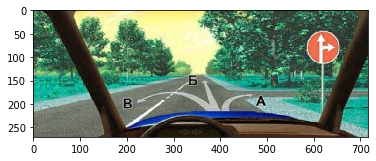

74 [-1 73 -1 -1]


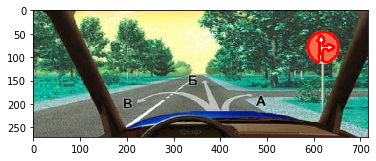

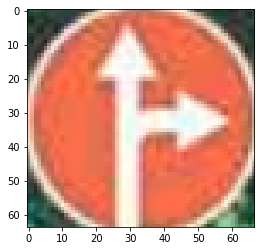

In [16]:
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def process_sign(adr_to_img, color):
    if color == "blue":
        hsv_min = (110,50,50) 
        hsv_max = (130,255,255)
    if color == "red":
        hsv_min = (0,50,20) 
        hsv_max = (5,255,255)
    img = cv.imread(adr_to_img)

    hsv = cv.cvtColor( img, cv.COLOR_BGR2HSV ) # меняем цветовую модель с BGR на HSV 
    thresh = cv.inRange( hsv, hsv_min, hsv_max ) # применяем цветовой фильтр
    # ищем контуры и складируем их в переменную contours
    contours, hierarchy = cv.findContours( thresh.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    plt.imshow(img)
    plt.show()
    k=0
    cont = []
    for i in range(len(hierarchy[0])):
        img = cv.imread(adr_to_img)
        cont.append(contours)

    num_cont = np.array([len(cont[0][i]) for i in range(len(cont[0]))]).argmax()
    cv.drawContours( img, contours, num_cont, (255,0,0), 3, cv.LINE_AA, hierarchy, 1 )
    print(i,hierarchy[0][i])
    plt.imshow(img)
    plt.show()
    rect = cv2.minAreaRect(contours[num_cont])
    img_croped = crop_minAreaRect(cv.imread(adr_to_img), rect)
    plt.imshow(img_croped)
    plt.show()
    
adr_to_img='3.png'

process_sign(adr_to_img, "blue")

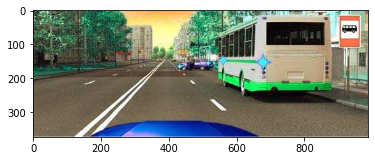

94 [-1 93 -1 -1]


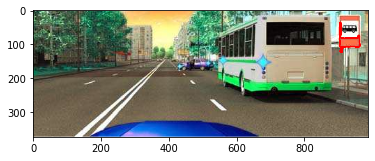

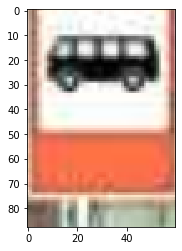

In [17]:
adr_to_img='8.png'
process_sign(adr_to_img, "blue")

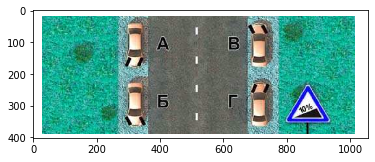

21 [-1 13 -1  0]


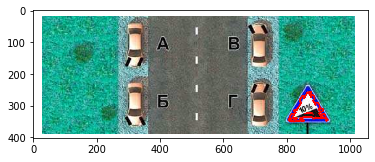

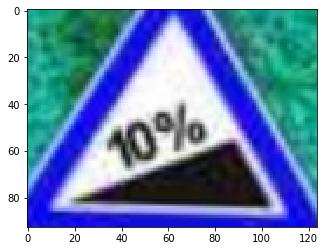

In [21]:
adr_to_img='0.png'
process_sign(adr_to_img, "red")